# **BACS2003 Artificial Intelligence**

### Segmentation of Music Streaming Users

## Group Members


| Name | Student ID |
| --- | --- |
| LAU AIK HUNG | 23WMR14555 |
| KESHANDRA A/L JAYASELAN | 23WMR14549 |
| LEONG CHUN XIANG | 23WMR15624 |


## Dataset

In [54]:
!pip install datasets

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [56]:
import pandas as pd

from IPython.display import display

# Load the Amazon products dataset
df = pd.read_csv('music_users.csv') 

# Display as a clean table 
display(df)

,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,Female,18,K-Pop,15,Yes,Spotify,UK,Free,High,PC,Afternoon,62
1,2,Male,34,Traditional,16,No,Apple Music,USA,Family,High,PC,Afternoon,19
2,3,Male,32,Chill,15,Yes,NetEase Cloud,Japan,Premium,Medium,Mobile,Afternoon,48
3,4,Male,41,Jazz,16,No,Apple Music,UK,Student,Medium,Smart Speaker,Morning,38
4,5,Male,21,Pop,23,Yes,QQ Music,Korea,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Male,45,Oldies,19,No,YouTube Music,France,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,Female,35,Oldies,17,Yes,Apple Music,USA,Free,High,Tablet,Night,26
9997,9998,Female,28,Traditional,5,No,Apple Music,USA,Student,Low,Tablet,Afternoon,26
9998,9999,Female,25,K-Pop,13,No,NetEase Cloud,France,Free,Medium,PC,Afternoon,76


## Data Analysis

### Data Transformation, Data Preparation

In [57]:
# Check the column names
print(df.columns)

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

Index(['UserID', 'Gender', 'Age', 'FavoriteMusicType', 'WeeklyListeningHours',
       'PaidSubscription', 'ListeningPlatform', 'Country', 'SubscriptionType',
       'GenrePreferenceLevel', 'DeviceType', 'ListeningTimeOfDay',
       'NumberOfPlaylists'],
      dtype='object')


In [58]:
# Check missing values
print(df.isnull().sum())

UserID                  0
Gender                  0
Age                     0
FavoriteMusicType       0
WeeklyListeningHours    0
PaidSubscription        0
ListeningPlatform       0
Country                 0
SubscriptionType        0
GenrePreferenceLevel    0
DeviceType              0
ListeningTimeOfDay      0
NumberOfPlaylists       0
dtype: int64


In [59]:
# check if the datatypes for the data needs to do tranform or not 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   UserID                10000 non-null  int64 
 1   Gender                10000 non-null  object
 2   Age                   10000 non-null  int64 
 3   FavoriteMusicType     10000 non-null  object
 4   WeeklyListeningHours  10000 non-null  int64 
 5   PaidSubscription      10000 non-null  object
 6   ListeningPlatform     10000 non-null  object
 7   Country               10000 non-null  object
 8   SubscriptionType      10000 non-null  object
 9   GenrePreferenceLevel  10000 non-null  object
 10  DeviceType            10000 non-null  object
 11  ListeningTimeOfDay    10000 non-null  object
 12  NumberOfPlaylists     10000 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1015.8+ KB
None


#### Change Gender to 1: Male 2: Female

In [60]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})

df

,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,K-Pop,15,Yes,Spotify,UK,Free,High,PC,Afternoon,62
1,2,1,34,Traditional,16,No,Apple Music,USA,Family,High,PC,Afternoon,19
2,3,1,32,Chill,15,Yes,NetEase Cloud,Japan,Premium,Medium,Mobile,Afternoon,48
3,4,1,41,Jazz,16,No,Apple Music,UK,Student,Medium,Smart Speaker,Morning,38
4,5,1,21,Pop,23,Yes,QQ Music,Korea,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,Oldies,19,No,YouTube Music,France,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,Oldies,17,Yes,Apple Music,USA,Free,High,Tablet,Night,26
9997,9998,2,28,Traditional,5,No,Apple Music,USA,Student,Low,Tablet,Afternoon,26
9998,9999,2,25,K-Pop,13,No,NetEase Cloud,France,Free,Medium,PC,Afternoon,76


#### Replace music genres with corresponding numeric values

In [61]:
# Replace music genres with corresponding numeric values
df['FavoriteMusicType'] = df['FavoriteMusicType'].replace({
    'Rock': 1,
    'Pop': 2,
    'J-Pop': 3,
    'K-Pop': 4,
    'EDM': 5,
    'Jazz': 6,
    'Chill': 7,
    'Oldies': 8,
    'Traditional': 9
})

df

C:\Users\Xiang\AppData\Local\Temp\ipykernel_11244\1985122484.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FavoriteMusicType'] = df['FavoriteMusicType'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,Yes,Spotify,UK,Free,High,PC,Afternoon,62
1,2,1,34,9,16,No,Apple Music,USA,Family,High,PC,Afternoon,19
2,3,1,32,7,15,Yes,NetEase Cloud,Japan,Premium,Medium,Mobile,Afternoon,48
3,4,1,41,6,16,No,Apple Music,UK,Student,Medium,Smart Speaker,Morning,38
4,5,1,21,2,23,Yes,QQ Music,Korea,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,No,YouTube Music,France,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,Yes,Apple Music,USA,Free,High,Tablet,Night,26
9997,9998,2,28,9,5,No,Apple Music,USA,Student,Low,Tablet,Afternoon,26
9998,9999,2,25,4,13,No,NetEase Cloud,France,Free,Medium,PC,Afternoon,76


#### Change PaidSubscription to 1:Yes 2:No

In [62]:
# Replace PaidSubscription values: 'Yes' -> 1, 'No' -> 2
df['PaidSubscription'] = df['PaidSubscription'].replace({'Yes': 1, 'No': 2})

df

C:\Users\Xiang\AppData\Local\Temp\ipykernel_11244\1531532316.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PaidSubscription'] = df['PaidSubscription'].replace({'Yes': 1, 'No': 2})


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,Spotify,UK,Free,High,PC,Afternoon,62
1,2,1,34,9,16,2,Apple Music,USA,Family,High,PC,Afternoon,19
2,3,1,32,7,15,1,NetEase Cloud,Japan,Premium,Medium,Mobile,Afternoon,48
3,4,1,41,6,16,2,Apple Music,UK,Student,Medium,Smart Speaker,Morning,38
4,5,1,21,2,23,1,QQ Music,Korea,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,YouTube Music,France,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,1,Apple Music,USA,Free,High,Tablet,Night,26
9997,9998,2,28,9,5,2,Apple Music,USA,Student,Low,Tablet,Afternoon,26
9998,9999,2,25,4,13,2,NetEase Cloud,France,Free,Medium,PC,Afternoon,76


#### Replace ListeningPlatform values with numeric values

In [63]:
# Replace ListeningPlatform values with numeric values
df['ListeningPlatform'] = df['ListeningPlatform'].replace({
    'Spotify': 1,
    'Apple Music': 2,
    'QQ Music': 3,
    'NetEase Cloud': 4,
    'YouTube Music': 5,
    'Amazon Music': 6
})

df

C:\Users\Xiang\AppData\Local\Temp\ipykernel_11244\1675106517.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ListeningPlatform'] = df['ListeningPlatform'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,UK,Free,High,PC,Afternoon,62
1,2,1,34,9,16,2,2,USA,Family,High,PC,Afternoon,19
2,3,1,32,7,15,1,4,Japan,Premium,Medium,Mobile,Afternoon,48
3,4,1,41,6,16,2,2,UK,Student,Medium,Smart Speaker,Morning,38
4,5,1,21,2,23,1,3,Korea,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,France,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,1,2,USA,Free,High,Tablet,Night,26
9997,9998,2,28,9,5,2,2,USA,Student,Low,Tablet,Afternoon,26
9998,9999,2,25,4,13,2,4,France,Free,Medium,PC,Afternoon,76


#### Replace Country values with numeric values

In [64]:
# Replace Country values with numeric values
df['Country'] = df['Country'].replace({
    'China': 1,
    'USA': 2,
    'Japan': 3,
    'Korea': 4,
    'UK': 5,
    'Germany': 6,
    'France': 7,
    'Brazil': 8,
    'India': 9,
    'Australia': 10
})

df

C:\Users\Xiang\AppData\Local\Temp\ipykernel_11244\2372742991.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Country'] = df['Country'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,5,Free,High,PC,Afternoon,62
1,2,1,34,9,16,2,2,2,Family,High,PC,Afternoon,19
2,3,1,32,7,15,1,4,3,Premium,Medium,Mobile,Afternoon,48
3,4,1,41,6,16,2,2,5,Student,Medium,Smart Speaker,Morning,38
4,5,1,21,2,23,1,3,4,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,7,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,1,2,2,Free,High,Tablet,Night,26
9997,9998,2,28,9,5,2,2,2,Student,Low,Tablet,Afternoon,26
9998,9999,2,25,4,13,2,4,7,Free,Medium,PC,Afternoon,76


#### Replace SubscriptionType values with numeric values

In [65]:
# Replace SubscriptionType values with numeric values
df['SubscriptionType'] = df['SubscriptionType'].replace({
    'Free': 1,
    'Premium': 2,
    'Family': 3,
    'Student': 4
})

df

C:\Users\Xiang\AppData\Local\Temp\ipykernel_11244\192492915.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SubscriptionType'] = df['SubscriptionType'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,5,1,High,PC,Afternoon,62
1,2,1,34,9,16,2,2,2,3,High,PC,Afternoon,19
2,3,1,32,7,15,1,4,3,2,Medium,Mobile,Afternoon,48
3,4,1,41,6,16,2,2,5,4,Medium,Smart Speaker,Morning,38
4,5,1,21,2,23,1,3,4,4,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,7,1,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,1,2,2,1,High,Tablet,Night,26
9997,9998,2,28,9,5,2,2,2,4,Low,Tablet,Afternoon,26
9998,9999,2,25,4,13,2,4,7,1,Medium,PC,Afternoon,76


#### Replace GenrePreferenceLevel values with numeric values

In [66]:
# Replace GenrePreferenceLevel values with numeric values
df['GenrePreferenceLevel'] = df['GenrePreferenceLevel'].replace({
    'High': 1,
    'Medium': 2,
    'Low': 3
})

df

C:\Users\Xiang\AppData\Local\Temp\ipykernel_11244\3488713849.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GenrePreferenceLevel'] = df['GenrePreferenceLevel'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,5,1,1,PC,Afternoon,62
1,2,1,34,9,16,2,2,2,3,1,PC,Afternoon,19
2,3,1,32,7,15,1,4,3,2,2,Mobile,Afternoon,48
3,4,1,41,6,16,2,2,5,4,2,Smart Speaker,Morning,38
4,5,1,21,2,23,1,3,4,4,3,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,7,1,2,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,1,2,2,1,1,Tablet,Night,26
9997,9998,2,28,9,5,2,2,2,4,3,Tablet,Afternoon,26
9998,9999,2,25,4,13,2,4,7,1,2,PC,Afternoon,76


#### Replace DeviceType values with numeric values

In [67]:
# Replace DeviceType values with numeric values
df['DeviceType'] = df['DeviceType'].replace({
    'Mobile': 1,
    'PC': 2,
    'Tablet': 3,
    'Smart Speaker': 4
})

df

C:\Users\Xiang\AppData\Local\Temp\ipykernel_11244\1773138368.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['DeviceType'] = df['DeviceType'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,5,1,1,2,Afternoon,62
1,2,1,34,9,16,2,2,2,3,1,2,Afternoon,19
2,3,1,32,7,15,1,4,3,2,2,1,Afternoon,48
3,4,1,41,6,16,2,2,5,4,2,4,Morning,38
4,5,1,21,2,23,1,3,4,4,3,1,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,7,1,2,4,Afternoon,12
9996,9997,2,35,8,17,1,2,2,1,1,3,Night,26
9997,9998,2,28,9,5,2,2,2,4,3,3,Afternoon,26
9998,9999,2,25,4,13,2,4,7,1,2,2,Afternoon,76


#### Replace ListeningTimeOfDay values with numeric values

In [68]:
# Replace ListeningTimeOfDay values with numeric values
df['ListeningTimeOfDay'] = df['ListeningTimeOfDay'].replace({
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4
})

df

C:\Users\Xiang\AppData\Local\Temp\ipykernel_11244\1792907625.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ListeningTimeOfDay'] = df['ListeningTimeOfDay'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,5,1,1,2,2,62
1,2,1,34,9,16,2,2,2,3,1,2,2,19
2,3,1,32,7,15,1,4,3,2,2,1,2,48
3,4,1,41,6,16,2,2,5,4,2,4,1,38
4,5,1,21,2,23,1,3,4,4,3,1,2,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,7,1,2,4,2,12
9996,9997,2,35,8,17,1,2,2,1,1,3,4,26
9997,9998,2,28,9,5,2,2,2,4,3,3,2,26
9998,9999,2,25,4,13,2,4,7,1,2,2,2,76


In [69]:
df = df.drop(['UserID'], axis=1)

# check if the datatypes for the data needs to do tranform or not 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Gender                10000 non-null  int64
 1   Age                   10000 non-null  int64
 2   FavoriteMusicType     10000 non-null  int64
 3   WeeklyListeningHours  10000 non-null  int64
 4   PaidSubscription      10000 non-null  int64
 5   ListeningPlatform     10000 non-null  int64
 6   Country               10000 non-null  int64
 7   SubscriptionType      10000 non-null  int64
 8   GenrePreferenceLevel  10000 non-null  int64
 9   DeviceType            10000 non-null  int64
 10  ListeningTimeOfDay    10000 non-null  int64
 11  NumberOfPlaylists     10000 non-null  int64
dtypes: int64(12)
memory usage: 937.6 KB
None


In [70]:
df.shape

(10000, 12)

In [71]:
df.columns

Index(['Gender', 'Age', 'FavoriteMusicType', 'WeeklyListeningHours',
       'PaidSubscription', 'ListeningPlatform', 'Country', 'SubscriptionType',
       'GenrePreferenceLevel', 'DeviceType', 'ListeningTimeOfDay',
       'NumberOfPlaylists'],
      dtype='object')

## Data Visualization

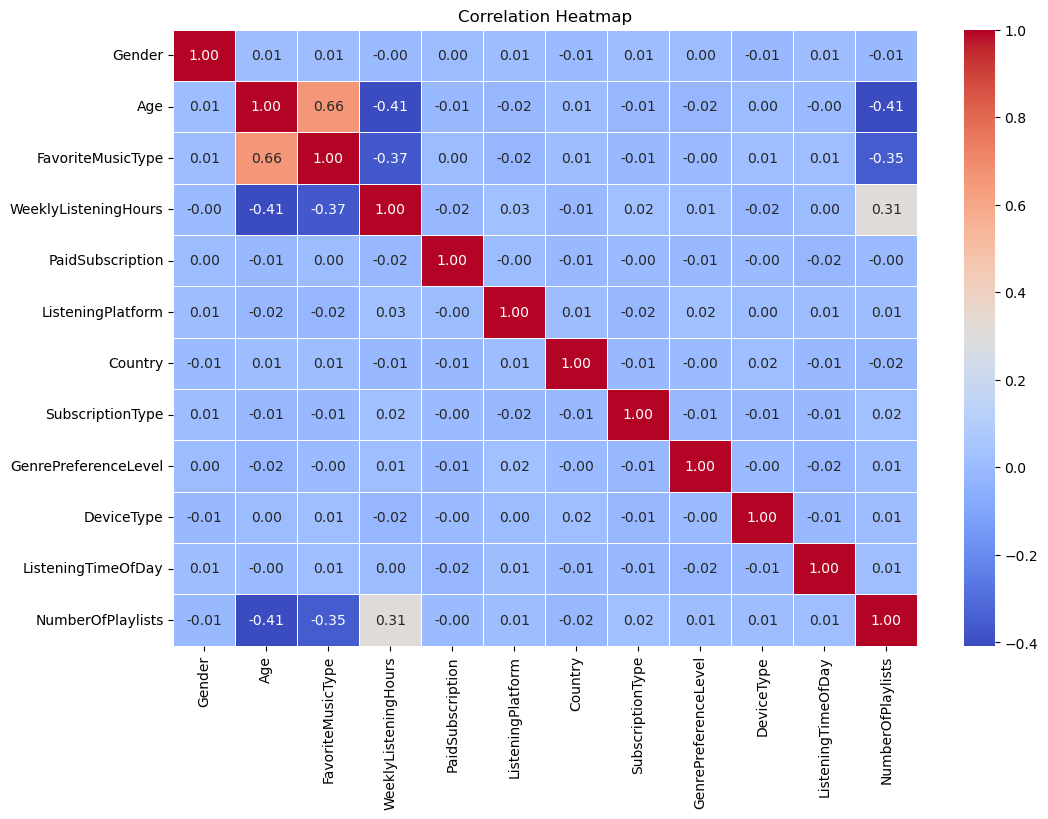

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## K-means

### Feature Scaling

In [73]:
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named df
features = df[['Age', 'NumberOfPlaylists', 'WeeklyListeningHours','FavoriteMusicType']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### Pairplot (for a subset of features)

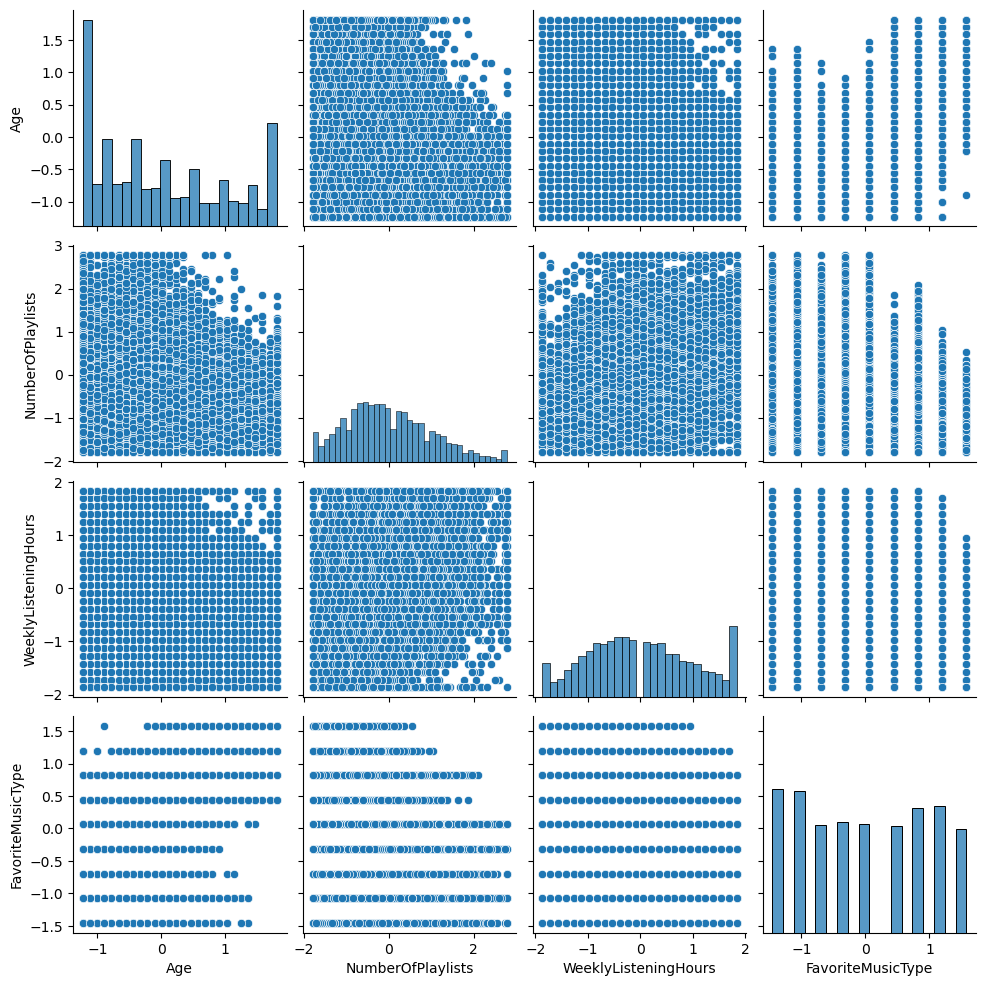

In [74]:
scaled_df = pd.DataFrame(scaled_features, columns=['Age', 'NumberOfPlaylists', 'WeeklyListeningHours','FavoriteMusicType'])
sns.pairplot(scaled_df)
plt.show()


### Heatmap of Correlation (on Scaled Data)

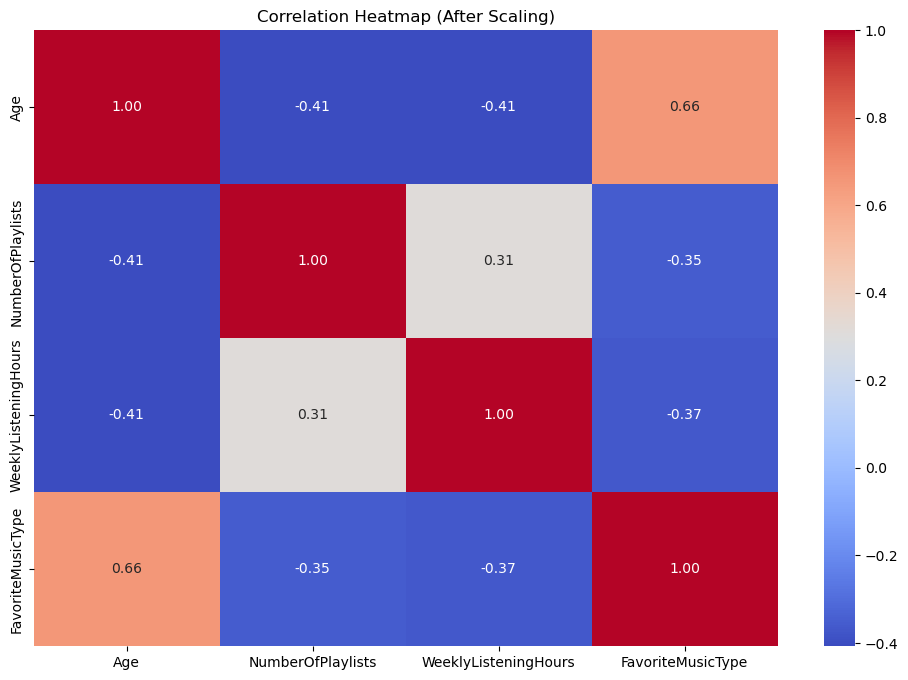

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (After Scaling)")
plt.show()


### Elbow Method

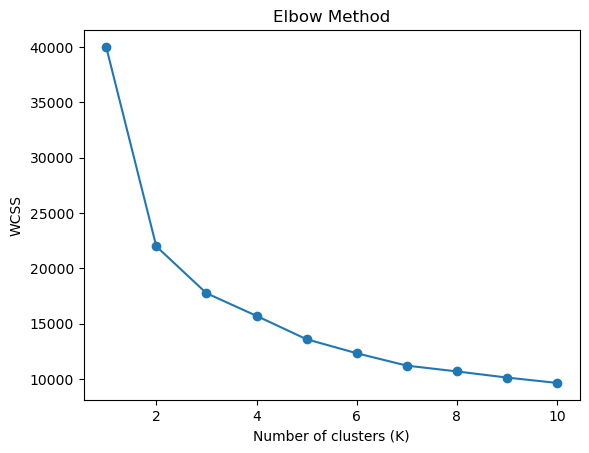

In [76]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-cluster sum of squares
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

### Silhouette Score Interpretation

In [77]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    print(f'Silhouette Score for k={k}: {score:.9f}')


Silhouette Score for k=2: 0.398285429
Silhouette Score for k=3: 0.311800543
Silhouette Score for k=4: 0.259152291
Silhouette Score for k=5: 0.252724706
Silhouette Score for k=6: 0.237753817
Silhouette Score for k=7: 0.233778054
Silhouette Score for k=8: 0.225345036
Silhouette Score for k=9: 0.210447345
Silhouette Score for k=10: 0.209578139


In [78]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)

In [79]:
df.groupby('Cluster').mean()

,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
Cluster,,,,,,,,,,,,
0,1.499585,23.310728,3.086387,20.455480,1.402587,3.016084,5.465097,2.523296,2.023711,2.493616,2.470735,48.275245
1,1.511968,37.389015,7.493323,13.249685,1.400101,2.965482,5.558075,2.467120,1.985387,2.510708,2.477198,25.471655


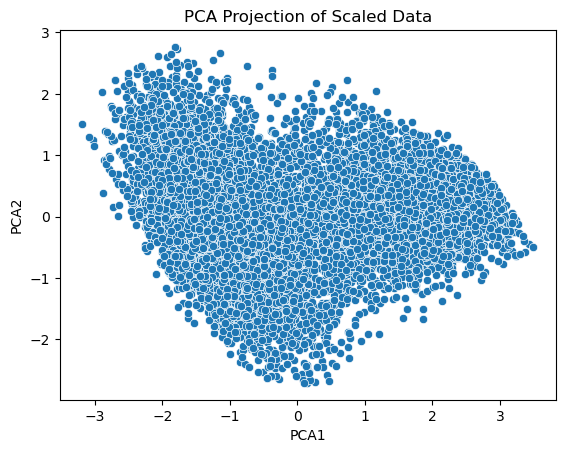

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title('PCA Projection of Scaled Data')
plt.show()

c:\Users\Xiang\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


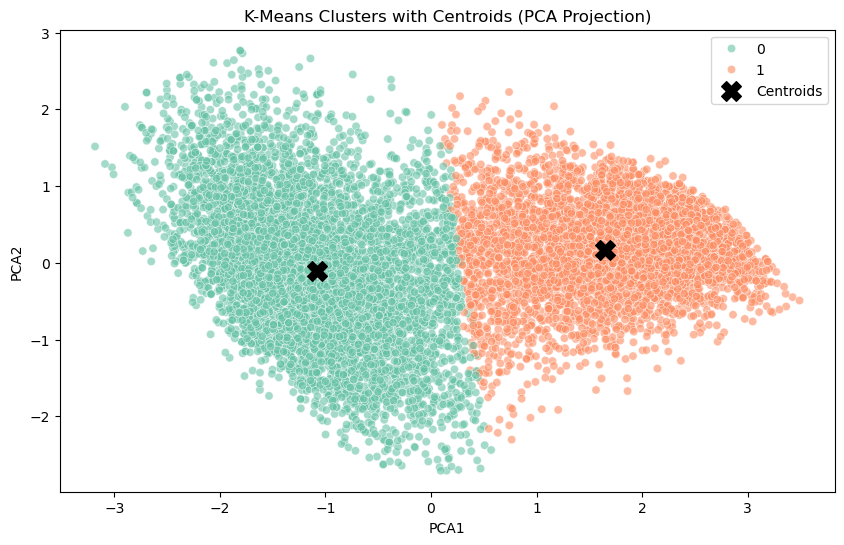

In [81]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# PCA on scaled data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Transform K-Means centroids to PCA space
centroids = kmeans.cluster_centers_          # in original feature space
centroids_pca = pca.transform(centroids)     # transform to PCA space

# Plot with centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', alpha=0.6)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title('K-Means Clusters with Centroids (PCA Projection)')
plt.legend()
plt.show()


In [82]:
df['Cluster'] = kmeans.labels_
cluster_profile = df.groupby('Cluster').mean(numeric_only=True)
cluster_profile


,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists,PCA1,PCA2
Cluster,,,,,,,,,,,,,,
0,1.499585,23.310728,3.086387,20.455480,1.402587,3.016084,5.465097,2.523296,2.023711,2.493616,2.470735,48.275245,-1.082880,-0.107897
1,1.511968,37.389015,7.493323,13.249685,1.400101,2.965482,5.558075,2.467120,1.985387,2.510708,2.477198,25.471655,1.645465,0.163953


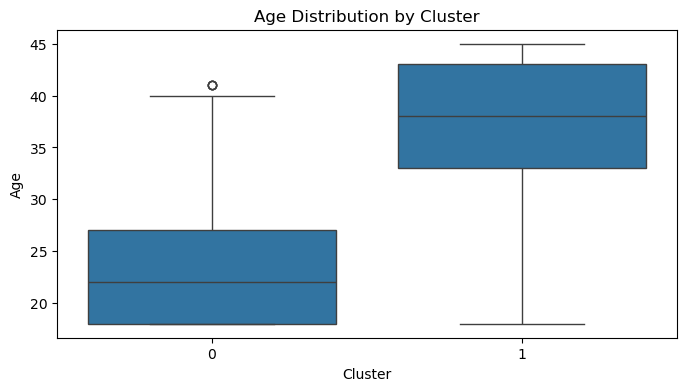

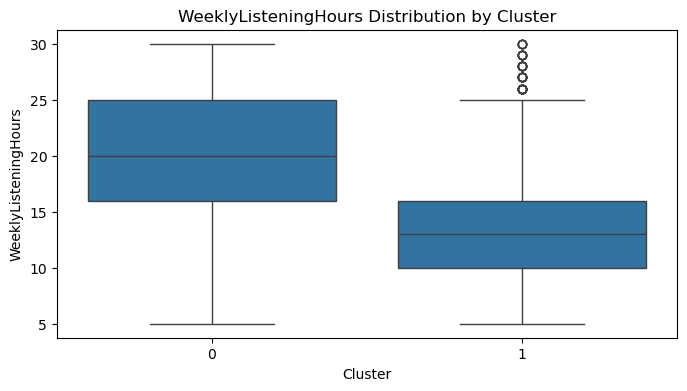

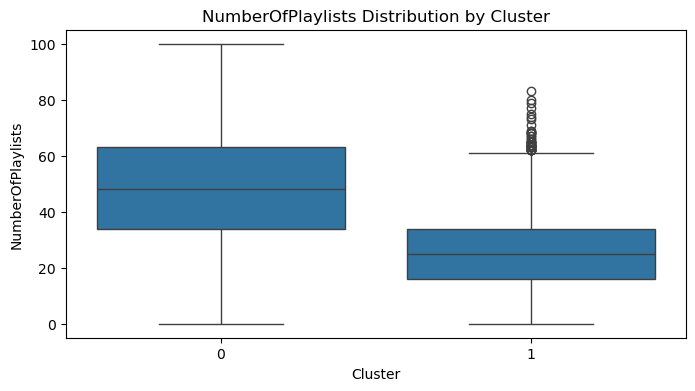

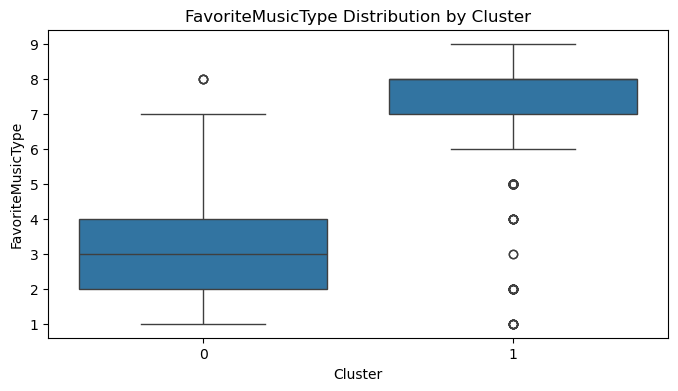

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ['Age', 'WeeklyListeningHours', 'NumberOfPlaylists','FavoriteMusicType']

for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'{feature} Distribution by Cluster')
    plt.show()



In [84]:
cluster_summary = df.groupby('Cluster').mean(numeric_only=True).T
mode_music_type = df.groupby('Cluster')['FavoriteMusicType'].agg(lambda x: x.mode()[0])

music_type_map = {
    1: 'Rock',
    2: 'Pop',
    3: 'J-Pop',
    4: 'K-Pop',
    5: 'EDM',
    6: 'Jazz',
    7: 'Chill',
    8: 'Oldies',
    9: 'Traditional'
}


for cluster in cluster_summary.columns:
    print(f"\nCluster {cluster}:")
    print(f"- Average Age: {cluster_summary.loc['Age', cluster]:.1f}")
    print(f"- Weekly Listening Hours: {cluster_summary.loc['WeeklyListeningHours', cluster]:.1f}")
    print(f"- Average Playlists: {cluster_summary.loc['NumberOfPlaylists', cluster]:.1f}")
    print(f"- Most Common Favorite Music Type: {music_type_map[mode_music_type[cluster]]}")



Cluster 0:
- Average Age: 23.3
- Weekly Listening Hours: 20.5
- Average Playlists: 48.3
- Most Common Favorite Music Type: Rock

Cluster 1:
- Average Age: 37.4
- Weekly Listening Hours: 13.2
- Average Playlists: 25.5
- Most Common Favorite Music Type: Oldies


## MeanShift

In [85]:
## import
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [86]:
features = ['Age', 'WeeklyListeningHours', 'NumberOfPlaylists', 'FavoriteMusicType']  # Adjust if needed
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Parameter Sensitivity Analysis
quantiles = [0.1, 0.2, 0.3, 0.4]
for q in quantiles:
    bandwidth = estimate_bandwidth(X_scaled, quantile=q, n_samples=5000)
    meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    meanshift.fit(X_scaled)
    labels = meanshift.labels_
    n_clusters = len(set(labels))
    
    print(f"Quantile: {q} | Clusters: {n_clusters}", end='')

    if n_clusters > 1:
        score = silhouette_score(X_scaled, labels)
        print(f" | Silhouette Score: {score:.4f}")
    else:
        print(" | Silhouette Score: Not applicable (only one cluster)")

Quantile: 0.1 | Clusters: 2 | Silhouette Score: 0.3987
Quantile: 0.2 | Clusters: 2 | Silhouette Score: 0.3983
Quantile: 0.3 | Clusters: 2 | Silhouette Score: 0.3985
Quantile: 0.4 | Clusters: 1 | Silhouette Score: Not applicable (only one cluster)


In [87]:
# Step 1: Estimate bandwidth
bandwidth = estimate_bandwidth(X_scaled, quantile=0.1, n_samples=5000)
print(f"Estimated Bandwidth: {bandwidth:.4f}")

# Step 2: Apply MeanShift
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift.fit(X_scaled)

# Step 3: Get labels
labels_ms = meanshift.labels_
cluster_centers = meanshift.cluster_centers_
n_clusters_ = len(set(labels_ms))

print(f"Number of estimated clusters: {n_clusters_}")

# Step 4: Evaluate clustering performance
silhouette_avg = silhouette_score(X_scaled, labels_ms)
print(f"Silhouette Score for MeanShift: {silhouette_avg}")

# Compare with Kmean
kmeans = KMeans(n_clusters=n_clusters_, random_state=42)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_
kmeans_score = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score (k={n_clusters_}): {kmeans_score:.4f}")

Estimated Bandwidth: 1.3311
Number of estimated clusters: 2
Silhouette Score for MeanShift: 0.3986604376987266
K-Means Silhouette Score (k=2): 0.3983


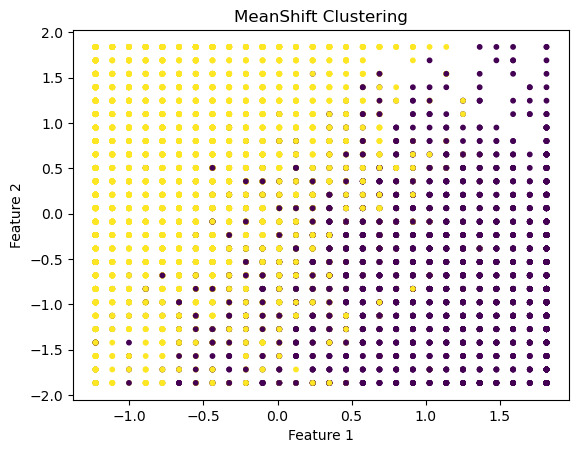

In [88]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_ms, cmap='viridis', s=10)
plt.title("MeanShift Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

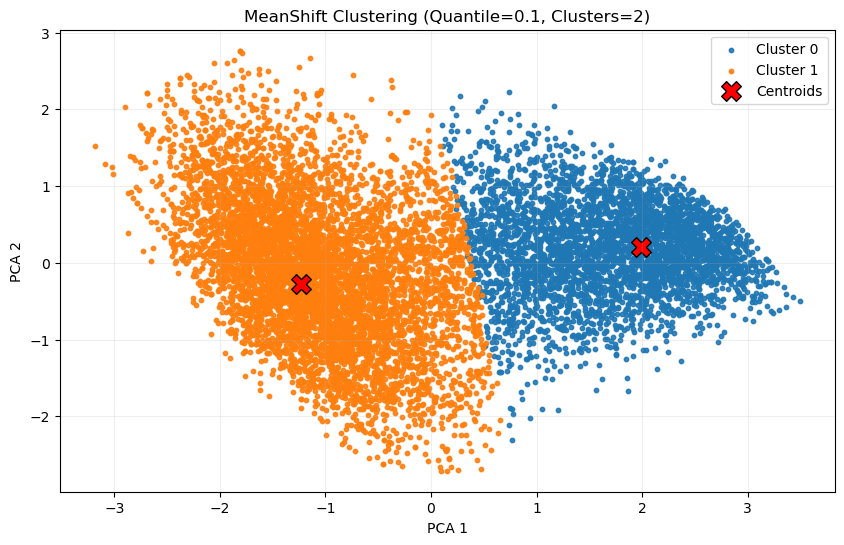

In [89]:
# Visualize Clusters (PCA 2D Projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))

# Plot each cluster separately for labeling
unique_labels = np.unique(labels_ms)
for cluster_id in unique_labels:
    cluster_points = X_pca[labels_ms == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
            s=10, alpha=0.9, label=f'Cluster {cluster_id}')
plt.title(f"MeanShift Clustering (Quantile=0.1, Clusters={n_clusters_})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Plot centroids
if n_clusters > 0:
    centroids_pca = pca.transform(meanshift.cluster_centers_)
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red', label='Centroids',edgecolor='black')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

In [109]:
# Execution Time Measurement, performance compare with other clustering method
import time

start = time.time()
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift.fit(X_scaled)
end = time.time()
print(f"MeanShift execution time: {end - start:.2f} seconds")

MeanShift execution time: 1.41 seconds


In [90]:
# Add cluster label to original dataframe
df["MeanShift_Cluster"] = labels_ms

# Display summary statistics per cluster
cluster_summary = df.groupby("MeanShift_Cluster")[features].mean()
print(cluster_summary)

                         Age  WeeklyListeningHours  NumberOfPlaylists  \
MeanShift_Cluster                                                       
0                  37.791971             13.197602          25.393639   
1                  23.363725             20.332414          47.831765   

                   FavoriteMusicType  
MeanShift_Cluster                     
0                           7.557351  
1                           3.141629  


In [92]:
# Map favorite music type codes to labels
music_labels = {
    1: 'Rock', 2: 'Pop', 3: 'J-Pop', 4: 'K-Pop', 5: 'EDM',
    6: 'Jazz', 7: 'Chill', 8: 'Oldies', 9: 'Traditional'
}

# Add cluster labels to the original DataFrame
df['Cluster'] = meanshift.labels_

# Summary statistics
summary = df.groupby('Cluster')[['Age', 'WeeklyListeningHours', 'NumberOfPlaylists']].mean().round(1)
fav_music = df.groupby('Cluster')['FavoriteMusicType'].agg(lambda x: x.mode().iloc[0])
cluster_counts = df['Cluster'].value_counts()


# Print cluster summaries
for cluster_id, row in summary.iterrows():
    music_code = fav_music[cluster_id]
    music_label = music_labels.get(music_code, 'Unknown')

    print(f"Cluster {cluster_id}:")
    print(f"- Users in Cluster: {cluster_counts[cluster_id]}")
    print(f"- Average Age: {row['Age']}")
    print(f"- Weekly Listening Hours: {row['WeeklyListeningHours']}")
    print(f"- Average Playlists: {row['NumberOfPlaylists']}")
    print(f"- Most Common Favorite Music Type: {music_label}")
    print()

Cluster 0:
- Users in Cluster: 3836
- Average Age: 37.8
- Weekly Listening Hours: 13.2
- Average Playlists: 25.4
- Most Common Favorite Music Type: Oldies

Cluster 1:
- Users in Cluster: 6164
- Average Age: 23.4
- Weekly Listening Hours: 20.3
- Average Playlists: 47.8
- Most Common Favorite Music Type: Rock



## DBSCAN

In [93]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# --- Step 1: Select and scale features
features = df[['Age', 'WeeklyListeningHours', 'NumberOfPlaylists', 'FavoriteMusicType']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [94]:
# --- Step 2: DBSCAN clustering
dbscan = DBSCAN(eps=2.0, min_samples=3)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

In [95]:
# --- Step 3: PCA for visualization (optional)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

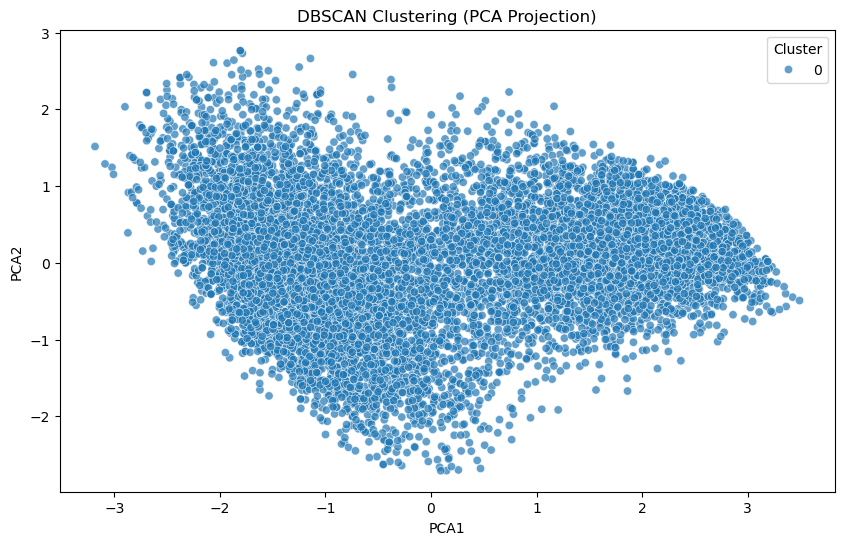

In [96]:

# --- Step 4: Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='tab10', alpha=0.7)
plt.title('DBSCAN Clustering (PCA Projection)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

In [97]:
# --- Step 5: Silhouette Score (optional, valid only if more than 1 cluster excluding -1)
labels = df['DBSCAN_Cluster']
n_clusters = len(set(labels)) - (1 if -1 in labels.values else 0)
print(f"Clusters found (excluding noise): {n_clusters}")
if n_clusters > 1:
    score = silhouette_score(scaled_features, labels)
    print(f'Silhouette Score (DBSCAN): {score:.4f}')
else:
    print("Silhouette Score not applicable: DBSCAN found less than 2 clusters.")

Clusters found (excluding noise): 1
Silhouette Score not applicable: DBSCAN found less than 2 clusters.


In [98]:
# --- Step 6: Custom mapping for music types
music_type_map = {
    1: 'Rock',
    2: 'Pop',
    3: 'J-Pop',
    4: 'K-Pop',
    5: 'EDM',
    6: 'Jazz',
    7: 'Chill',
    8: 'Oldies',
    9: 'Traditional'
}

# --- Step 7: Cluster summaries
clusters = sorted(df['DBSCAN_Cluster'].unique())
for cluster in clusters:
    cluster_data = df[df['DBSCAN_Cluster'] == cluster]
    
    if cluster == -1:
        print(f"Cluster {cluster} (Noise):")
    else:
        print(f"Cluster {cluster}:")

    avg_age = cluster_data['Age'].mean()
    avg_hours = cluster_data['WeeklyListeningHours'].mean()
    avg_playlists = cluster_data['NumberOfPlaylists'].mean()

    if not cluster_data.empty:
        top_music_code = cluster_data['FavoriteMusicType'].mode()[0]
        top_music = music_type_map.get(top_music_code, "Unknown")
    else:
        top_music = "N/A"

    print(f"- Average Age: {avg_age:.1f}")
    print(f"- Weekly Listening Hours: {avg_hours:.1f}")
    print(f"- Average Playlists: {avg_playlists:.1f}")
    print(f"- Most Common Favorite Music Type: {top_music}\n")

Cluster 0:
- Average Age: 28.9
- Weekly Listening Hours: 17.6
- Average Playlists: 39.2
- Most Common Favorite Music Type: Rock



## Agglomerative Hierarchical Clustering

In [99]:
from sklearn.preprocessing import StandardScaler

features = df[['Age', 'WeeklyListeningHours', 'NumberOfPlaylists', 'FavoriteMusicType']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [100]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2)
df['Agglomerative_Cluster'] = agg.fit_predict(scaled_features)


In [101]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]


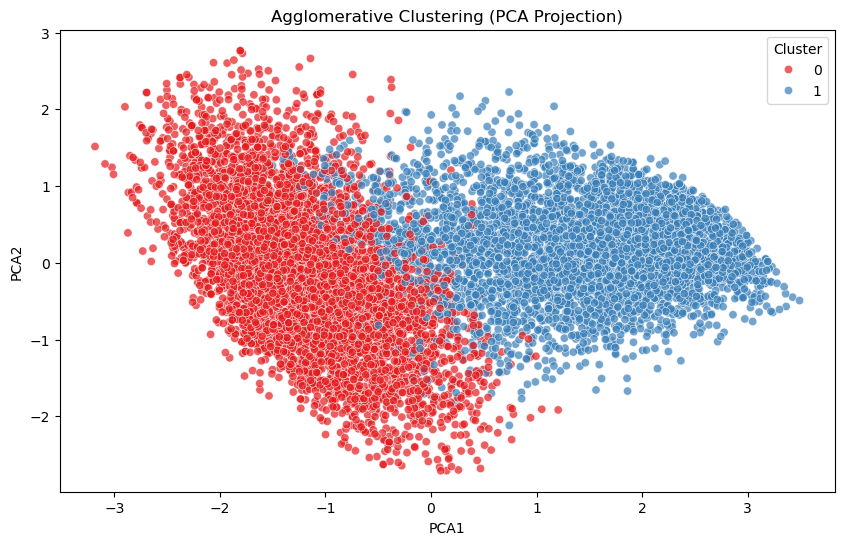

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Agglomerative_Cluster', palette='Set1', alpha=0.7)
plt.title('Agglomerative Clustering (PCA Projection)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()


In [103]:
from sklearn.metrics import silhouette_score

labels = df['Agglomerative_Cluster']
score = silhouette_score(scaled_features, labels)
print(f'Silhouette Score (Agglomerative): {score:.4f}')


Silhouette Score (Agglomerative): 0.3721


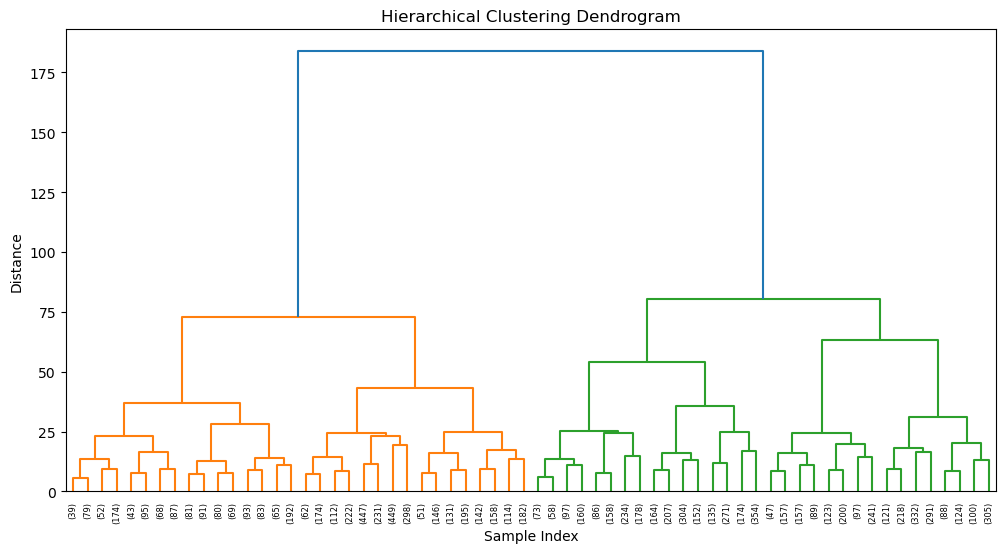

In [104]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Dendrogram
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [105]:
# Summary output
clusters = df['Agglomerative_Cluster'].unique()

music_type_map = {
    1: 'Rock',
    2: 'Pop',
    3: 'J-Pop',
    4: 'K-Pop',
    5: 'EDM',
    6: 'Jazz',
    7: 'Chill',
    8: 'Oldies',
    9: 'Traditional'
}

for cluster in sorted(clusters):
    cluster_data = df[df['Agglomerative_Cluster'] == cluster]
    avg_age = cluster_data['Age'].mean()
    avg_hours = cluster_data['WeeklyListeningHours'].mean()
    avg_playlists = cluster_data['NumberOfPlaylists'].mean()
    
    # Most common favorite music type (numeric)
    top_music_code = cluster_data['FavoriteMusicType'].mode()[0]
    top_music = music_type_map.get(top_music_code, "Unknown")

    print(f"Cluster {cluster}:")
    print(f"- Average Age: {avg_age:.1f}")
    print(f"- Weekly Listening Hours: {avg_hours:.1f}")
    print(f"- Average Playlists: {avg_playlists:.1f}")
    print(f"- Most Common Favorite Music Type: {top_music}\n")


Cluster 0:
- Average Age: 23.2
- Weekly Listening Hours: 20.4
- Average Playlists: 48.6
- Most Common Favorite Music Type: Rock

Cluster 1:
- Average Age: 35.9
- Weekly Listening Hours: 14.2
- Average Playlists: 27.8
- Most Common Favorite Music Type: Oldies

